# ATM4110 Final project

You are given the aerosol optical depth (AOD) data that were spatially randomly selected from the [monthly mean MERRA-2 reanalysis dataset](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/) . 

### The objective 
perform the optimal interpolation to map the irregular data onto the regularly gridded space at each time record and the empirical orthogonal functions (EOFs) analysis to find out the spatial patterns that represent the variability of the data. 

### Instruction
I started the code by reading the data files. (I hope these cells useful.)
Then I plotted the data averaged over January 1980.

When constructing the covariance matrix, we can assume that the covariance is assumed to be homogeneous and isotropic, which leads us to use a single length scale applied to all directions in estimating the covariance matrix with either Gaussian or Markov functions.

When doing EOFs, you may need to remove the seasonality if you are not very interested in this pattern in the data.

Finally, discuss the results of your analysis by providing a few points what you learn by doing this final project. If you do not write down this, you wouldn't be given full credit. 

And don't forget to leave comments about what you are doing in the code.

Okay, I think this is all I have now. 
If you find something weird, please let me know as soon as possible!

**You can turn in the final project in the jupyter notebook format. So, please continue from here to fulfill the objective.**
**The due date is 12/21.** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs

Reading the data

In [2]:
data1 = np.load('aod_data.npz')
aod = data1['aod']
time = data1['tidx']
xx = data1['xx']
yy = data1['yy']

# To get the meaningful information from *time*, 
timestr = [datetime.datetime.fromordinal(time[it]).isoformat() for it in range(len(time))]

Reading the grid on which we want to perform optimal interpolation. 

In [3]:
data2 = np.load('grid_data.npz')
lon = data2['lon']
lat = data2['lat']

Just to show the data set.

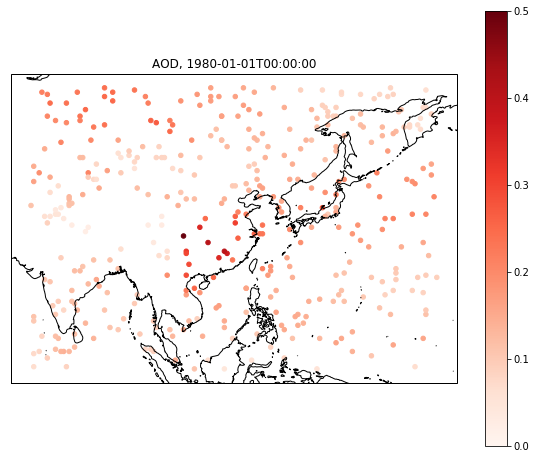

In [4]:
it = 0
plt.figure(1, figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
pp = ax.scatter(xx, yy, 20, aod[it, :], vmin=0, vmax=0.5, cmap='Reds', 
                transform=ccrs.PlateCarree())
ax.set_title('AOD, '+timestr[it])
plt.colorbar(pp)